# Lab Week 8 - solution

**Objectives:** This week's lab is about writing code that is reuseable, efficient and well-organized. How do we do this? Functions! The objective here is to take code from week 6 and re-package it in a better, more pythonic style. We will then test the code with a couple of datasets for the lab to make sure it can handle a range of input types and user-specified parameters, while still getting the right answer.

As an example of how we can reuse code, you will use what you write for this lab as a core function for assignment 1.

### As always, first import the packages you'll need

In [1]:
from e211_lib import e211
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# your posix_to_datetime function will go here (see below for details)

### BEGIN SOLUTION
def posix_to_datetime(time_array):
    """
    Converts numpy arrays of POSIX time to datetime objects.

        IN: array of POSIX time of length N (dtype=int or float)

        OUT: array of dtype=datetime.datetime object, length N
    """
    dt = np.empty_like(time_array, dtype="O")
    for index, tt in enumerate(time_array):
        dt[index] = datetime.fromtimestamp(tt)
    return dt

# This also works
# for index in range(len(time_array)):         
#    dt[index] = datetime.fromtimestamp(time_array[index])

#  And this does - note the for loop is not a separate line here
#  dt = np.array([datetime.fromtimestamp(tt) for tt in time]) 
### END SOLUTION

In [3]:
# IN THIS CELL DEFINE TWO FUNCTIONS WITH THE FOLLOWING NAMES AND SIGNATURES

# check_inputs(winlen) return winlen

# running_mean(data, winlen) return running mean

### BEGIN SOLUTION
def check_inputs(winlen):
    """
    checks that user inputs "winlen" are an odd number and corrects them if not

        IN: winlen (int)

        OUT: winlen of guaranteed odd value (int)
    """  
    if winlen % 2 == 0:
        winlen += 1
        print(
            f"odd window length {winlen - 1} detected, using window length {winlen} instead"
        )

    return winlen

def running_mean(data, winlen):
    """
    filters data with a running mean with window length winlen

        IN: numpy array of data (dtype=int or float), winlen (dtype=int)
        note here that no default has been set for winlen

        OUT: filtered array (dtype=float)
    """
    winlen = check_inputs(winlen)  # call the check_inputs from inside another fcn!
    ndat = len(data)
    ww = int((winlen - 1) / 2)
    # print(f"N = {ndat}, L = {winlen}, W = {ww}")  #print statement for debugging

    z = np.zeros_like(data, dtype="O")

    for i in range(ndat):
        if (i < ww) or (i > ndat - ww - 1):  # be careful with the limits!
            # print(
            #    f"special end case at point i = {i}"
            # )  # print statements to check what is in the special end cases
            z[i] = data[i]  # at ends just set running mean equal to unfiltered value
        else:  # running mean is executed from ww to ndat-1-ww inclusive
            for j in range(-ww, ww + 1):
                z[i] += data[i + j]
            z[i] = z[i] / winlen
    return z
### END SOLUTION

In [4]:
# IN THIS CELL DEFINE YOUR RUNNING MEDIAN FUNCTION WITH THIS NAME AND SIGNATURE
#
# running_median(data, winlen=7)
### BEGIN SOLUTION
def running_median(data, winlen=7):
    """
    filters data with a running median, window length winlen

        IN: numpy array of data (int or float), winlen (dtype=int)
            winlen here has been set with a default of 7

        OUT: median filtered array (dtype=int or float)
    """
    winlen = check_inputs(winlen)  # call the check_inputs from inside another fcn!
    window_ind = int((winlen - 1) / 2)  # equation 4
    zm = np.zeros_like(data)

    for i in range(window_ind, len(data) - window_ind):
        # deal with the edges by ignoring them ^

        # median
        window = list(data[i - window_ind : i + window_ind + 1])
        while len(window) > 1:
            window.remove(max(window))
            window.remove(min(window))
        zm[i] = window[0]
    return zm
### END SOLUTION

### Now get some data sets.  
Remind yourself of np.load and what `.npz` files contain from the week 6 lab. Also review the week 6 lab to remind yourself about datetime objects are and how to import dates/times into a numpy array of datetime objects.

In [5]:
# get the aircraft data again -- copy from week 6 solution
aircraft_gps = np.load("aircraft_gps.npz")
vel = aircraft_gps["vel"]
time = aircraft_gps["time"]

# very similar for a file with temperatures from Sand Heads, BC
sand_heads = np.load("sand_heads_temps.npz")
temp = sand_heads["temp"]
sand_time = sand_heads["time"]

### Setting up your first function
First define a function called `posix_to_datetime` that takes as input an array of POSIX times and returns a variable `dt` that is a numpy array of datetime objects.  To help you get started the function declaration line and the return statement are provided.  Complete the rest of the fucntion code, making sure to include the docstring.  The structure of your function will look something like this:  

```
def posix_to_datetime(time_array):
    """
    <docstring>
    """
    
    <function body code>
    
    return dt
```
Remember that any functions in your code need to be defined *before* they are used.  So they go at the top of your file, after importing the packages.

### Testing your function
You can save yourself a lot of time by testing pieces of your code as you go along.  Test your `posix_to_datetime` function by loading the data sets, calling it and making test plots of each of the two data sets.  e.g., my test plot was made after calling posix_to_datetime, assigning the output to a variable called `fly_time` and making a plot with these code lines.
```
# quick and dirty plot to check everything is working ok
plt.plot(fly_time, vel)
plt.xlabel('time [units]')  # reminding myself to always include units
plt.xticks(rotation=70)     # rotate dates by 70 degrees so they don't overlap
plt.ylabel('vel [units]');  #add semicolon to suppress output
```

### Running mean and running median functions
Now take your running mean code from the week6 lab and turn it into a function called `running_mean`.  If your week6 lab code did not work, you can use the solution posted on the course web page under week 6. `running_mean` should take as INPUT arguments `data` (the numpy array of data on which the running mean is to be performed) and `winlen` (the number of points in the running mean window) **in that order**. It should return a variable `z` that contains the running mean values.

Likewise take your running median code from the week6 lab and turn it into a function called `running_median` that takes as INPUT arguments `data` and `winlen` (again, in that order) and returns a variable `zm` that contains the running median values.

Again, test your functions by
1. calling them 
2. plotting the raw data and the running mean/median to check it all looks reasonable

### Adding input parameter check
Now write code that will check that the window length is an odd number, and if it is not add 1 to the length and print a message to the screen informing the user the value of the window length that was passed in, the fact that it was even and the value that it has been corrected to.  Put this code in a function called `check_inputs` that takes as input `winlen`.  It must also return `winlen` either unmodified if it is odd, or modified if it is even.

Both the running mean and running median functions should call the `check_inputs` function. 
You can call functions from other functions, you just need to (a) keep track of which variables are passed where, and (b) scope (discussed in class).

Make sure to rerun your code that calls the running mean and running median to check (a) you didn't break anything, and (b) that `check_inputs` works.

### What to turn in

1) define your posix_to_datetime in cell 2 (remove the exceptions in all fill-in cells)

2) define your check_inputs and running_mean functions in cell 3

3) define  your running_median function in cell 4 

Make sure your running_median function works when you test it by executing
code roughly similar to the cell below
for either the `aircraft` data set or the `temperature` dataset.  We will run
code similar to this, with a variety of window sizes and data sets.

```
def main(data,tt):
    time=posix_to_datetime(tt)
    windows = choose some windows
    loop over your windows
        filtered_data = running_median ...
        #
        # overlay the filtered data on the raw data
        #
        plt.plot(time,data,time,filtered_data)
        plt.xlabel('time')
        plt.xticks(rotation=70)
        plt.ylabel('y values')
        plt.show()
        
main(vel,time)
```

## A quick sanity check

This code shows the raw data

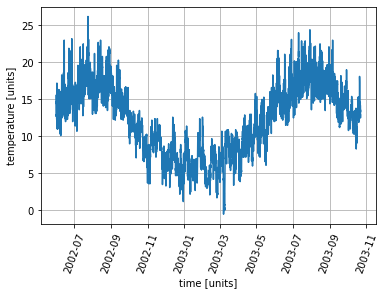

In [6]:
# Sands Heads data
temp_time = posix_to_datetime(sand_time)

# quick and dirty plot to check everything is working ok
plt.plot(temp_time, temp)
plt.xlabel('time [units]')
plt.xticks(rotation=70)
plt.grid(True)
plt.ylabel('temperature [units]');   # I added semi-colon to suppress text output

The cell below tests window length 32 for the velocity data and 
compares the result at index = 231 with the answer we got with our
own running_median filter

In [7]:
import numpy.testing as nt
window=32
vel_median_filtered = running_median(vel, window)
testval = vel_median_filtered[231]
nt.assert_allclose(testval,1.95,rtol=1.e-2)

odd window length 32 detected, using window length 33 instead


Running median test, winlen = 11


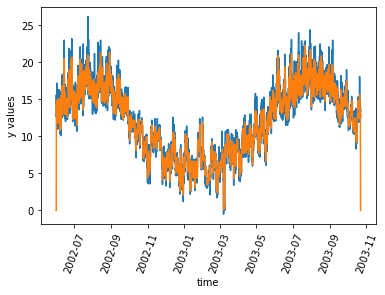

Running median test, winlen = 42
odd window length 42 detected, using window length 43 instead


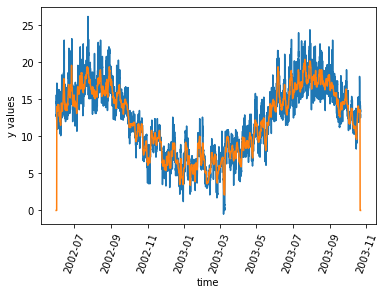

Running median test, winlen = 153


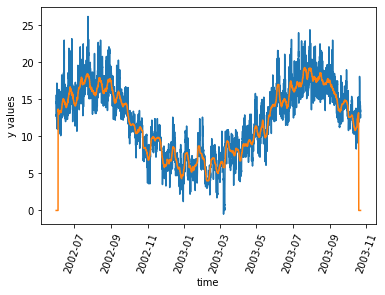

In [8]:
# You don't need to enter anything here  -- we have hidden the
# code we will use to check your functions in this cell

### BEGIN SOLUTION
def main(data,tt):
    time=posix_to_datetime(tt)
    windows = [11,42,153]
    for window in windows:
        print(f'Running median test, winlen = {window}')
        filtered_data = running_median(data, window)
        plt.plot(time,data,time,filtered_data)
        plt.xlabel('time')
        plt.xticks(rotation=70)
        plt.ylabel('y values')
        plt.show()
main(temp,sand_time)
### END SOLUTION